In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Titanic dataset from seaborn
import seaborn as sns
# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Drop columns with too many missing values or that are irrelevant for analysis
titanic = titanic.drop(columns=['embarked', 'who', 'deck', 'embark_town', 'alive', 'class'])

# Fill missing values in 'age' and 'fare' with their means using an updated method to avoid warnings
titanic['age'] = titanic['age'].fillna(titanic['age'].mean())
titanic['fare'] = titanic['fare'].fillna(titanic['fare'].mean())

# One-hot encode categorical variables
titanic = pd.get_dummies(titanic, drop_first=True)

In [ ]:
# Separate features (X) and target (y)
X = titanic.drop(columns=['survived'])
y = titanic['survived']


# Standardize the data (mean-centering and scaling)
scaler = StandardScaler()
titanic_scaled = scaler.fit_transform(X)

# Check the shape of the scaled dataset
print(f"Shape of the dataset after standardization: {titanic_scaled.shape}")


Shape of the dataset after standardization: (891, 8)


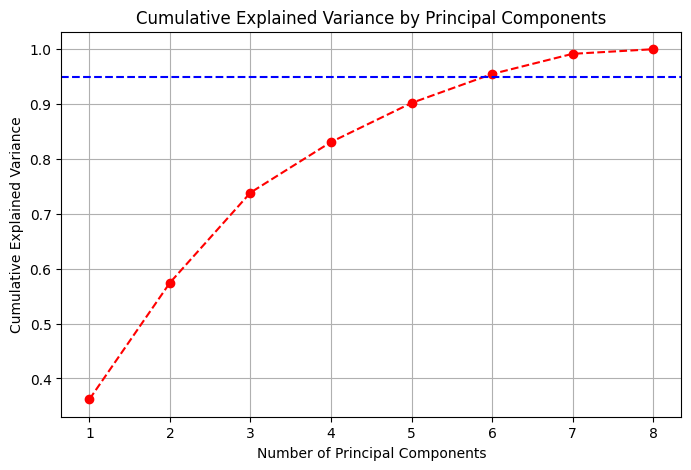

Number of components that explain at least 95% variance: 6


In [ ]:
# Perform PCA and compute explained variance
pca = PCA()
pca.fit(titanic_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.axhline(y=0.95, color='b', linestyle='--')  # Line indicating 95% variance
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Select the number of components that explain at least 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components that explain at least 95% variance: {n_components_95}")


In [ ]:
# Apply PCA with the selected number of components
pca_95 = PCA(n_components=n_components_95)
titanic_reduced_95 = pca_95.fit_transform(titanic_scaled)

# Check the shape of the reduced dataset
print(f"Shape of the dataset after PCA (95% variance): {titanic_reduced_95.shape}")


Shape of the dataset after PCA (95% variance): (891, 6)


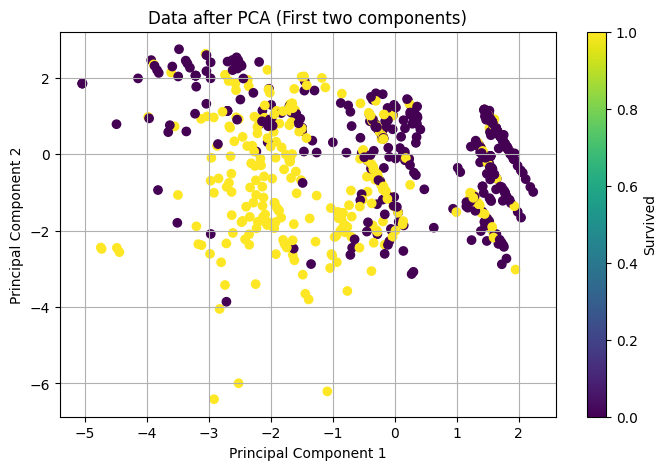

In [ ]:
# Visualization after PCA (for the first 2 components)
plt.figure(figsize=(8, 5))
plt.scatter(titanic_reduced_95[:, 0], titanic_reduced_95[:, 1], c=y, cmap='viridis')
plt.title('Data after PCA (First two components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived')
plt.grid(True)
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression without PCA (original data)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_before_pca = accuracy_score(y_test, y_pred)
print(f"Accuracy before PCA: {accuracy_before_pca:.4f}")

# Logistic Regression after PCA (with 95% variance retained)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(titanic_reduced_95, y, test_size=0.2, random_state=42)

clf_pca = LogisticRegression()
clf_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = clf_pca.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Accuracy after PCA (95% variance): {accuracy_after_pca:.4f}")


Accuracy before PCA: 0.8101
Accuracy after PCA (95% variance): 0.8101
